<a href="https://colab.research.google.com/github/Antik0829/AI-Project-/blob/main/191_15_2592.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
!pip3 install catboost

     |████████████████████████████████| 69.2 MB 5.5 kB/s 


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from  xgboost import XGBClassifier
from scipy import stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import os
from catboost import CatBoostClassifier

In [34]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [35]:
data = pd.read_csv('/content/gdrive/MyDrive/Classroom/data mining lab/hypothyroid.csv')

In [36]:
data.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [37]:
data=data.rename(columns={data.columns[0]:"target"})

In [38]:
data.isna().sum()

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [39]:
for column in data.columns:
    listOfValues=set(data[column])
    print(column,": ",listOfValues)

target :  {'hypothyroid', 'negative'}
Age :  {'72', '92', '4', '7', '74', '26', '66', '53', '41', '56', '33', '47', '1', '13', '82', '45', '27', '14', '70', '97', '44', '76', '38', '61', '5', '30', '15', '71', '21', '78', '43', '34', '39', '83', '8', '54', '35', '37', '88', '93', '81', '68', '22', '23', '87', '79', '69', '80', '58', '?', '31', '63', '89', '75', '67', '19', '52', '60', '90', '85', '28', '32', '17', '98', '64', '77', '48', '51', '86', '9', '36', '62', '57', '12', '18', '46', '65', '10', '6', '40', '24', '59', '73', '29', '25', '50', '20', '42', '11', '84', '55', '16', '49'}
Sex :  {'M', 'F', '?'}
on_thyroxine :  {'t', 'f'}
query_on_thyroxine :  {'t', 'f'}
on_antithyroid_medication :  {'t', 'f'}
thyroid_surgery :  {'t', 'f'}
query_hypothyroid :  {'t', 'f'}
query_hyperthyroid :  {'t', 'f'}
pregnant :  {'t', 'f'}
sick :  {'t', 'f'}
tumor :  {'t', 'f'}
lithium :  {'t', 'f'}
goitre :  {'t', 'f'}
TSH_measured :  {'y', 'n'}
TSH :  {'2.6', '1.4', '4.3', '125', '0.04', '11.6', '2

In [40]:
data=data.replace({"?":np.NAN})
data.isna().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [41]:
del data["TBG"]

In [42]:
data.dropna(axis = 0, thresh = 21, inplace = True)
data.isna().sum()

target                         0
Age                          418
Sex                           68
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          222
T3_measured                    0
T3                           449
TT4_measured                   0
TT4                            3
T4U_measured                   0
T4U                            2
FTI_measured                   0
FTI                            1
TBG_measured                   0
dtype: int64

In [43]:
data = data.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})
display(data.dtypes)

target                         int64
Age                           object
Sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
dtype: object

In [44]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

data = data.interpolate(method = 'spline', order = 4)
data.isna().sum()

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

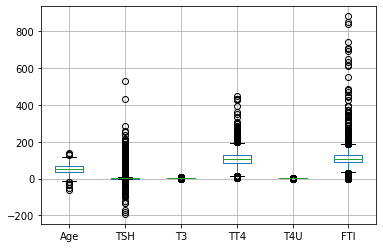

In [45]:
data[['Age','TSH','T3','TT4','T4U','FTI']].boxplot()

In [46]:
def fdiscretizer(attribute,dataframe):
    enc = LabelEncoder()
    dataframe[attribute] = pd.qcut(dataframe[attribute], 10, duplicates='drop')
    dataframe[attribute] = enc.fit_transform(dataframe[attribute])
    dataframe = dataframe.convert_dtypes(convert_integer=True)

fdiscretizer('Age',data)
fdiscretizer('TSH',data)
fdiscretizer('T3',data)
fdiscretizer('TT4',data)
fdiscretizer('T4U',data)
fdiscretizer('FTI',data)

display(data.head())

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,8,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7,1,0,1,0,1,9,1,0,0
1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,7,1,3,1,0,1,8,1,0,0
2,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,5,1,0,0
3,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7,1,0,1,0,1,6,1,0,0
4,1,8,0.0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,1,1,0,1,9,1,0,0


In [47]:
corr_values = abs(data[data.columns[0:]].corr()['target'][:])
corr_values = corr_values.drop('target')
corr_values = corr_values[corr_values > 0.10]
corr_values

TSH    0.372181
T3     0.202297
TT4    0.345405
T4U    0.109854
FTI    0.355763
Name: target, dtype: float64

In [48]:
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['target']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(data)

In [49]:
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    "CatBoostClassifier" : CatBoostClassifier(max_depth=3,verbose=0),
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5),
    "Naive Bayes" : GaussianNB()
}

In [50]:
def classification(classifiers):
    # Creo un dataframe per visualizzare i risultati calcolati
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "FScore"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "FScore":round(fs, 4)}, ignore_index=True)
                 
  res.set_index("Accuracy", inplace=True)
  res.sort_values(by="Accuracy", ascending=False, inplace=True)   
  return res

display(classification(classifiers))

,Classifier,Precision,Recall,FScore
Accuracy,,,,
0.9792,CatBoostClassifier,0.8903,0.9179,0.9036
0.9761,XGBClassifier,0.8706,0.9163,0.8919
0.9740,Decision Tree,0.8585,0.9152,0.8844
0.9730,Nearest Neighbors,0.8589,0.8969,0.8768
0.9699,Naive Bayes,0.8305,0.9396,0.8759
